# Combine Binance and Twitter data

**Project Design Document:** https://docs.google.com/drawings/d/1JbpGdQX-BJsWonSfLEyi8_PxJepc_7Xjsn8U0kIOkLs/edit

## Setup

In [1]:
# Python 3.7.9

############### UNCOMMENT AND  RUN THIS TO INSTALL LIBRARIES

# ! pip install numpy==1.19.5
# ! pip install pandas==1.2.3
# ! pip install plotly==4.12.0

In [2]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import json_normalize
from tqdm import tqdm
tqdm.pandas()

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})

import plotly
import plotly.express as px
import plotly.graph_objects as go

In [3]:
print("Python:", sys.version)
print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)
print("Plotly:", plotly.__version__)

Python: 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
Numpy: 1.19.5
Pandas: 1.2.3
Plotly: 4.12.0


## Widgets

In [4]:
## Widgets
import ipywidgets as widgets

In [5]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

In [6]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

## Load Binance dataset

In [7]:
# Binance
# binance_df = pd.read_csv("../data/ETHUSDT_1d_price_data.csv", index_col=0)
binance_df = pd.read_csv("../data/NMRUSDT_1d_price_data.csv", index_col=0)

In [8]:
binance_df.shape

(402, 18)

In [9]:
binance_df.head()

open_time               close_time  \
2020-08-20 02:59:59.999  2020-08-19 00:00:00.000  2020-08-19 23:59:59.999   
2020-08-21 02:59:59.999  2020-08-20 00:00:00.000  2020-08-20 23:59:59.999   
2020-08-22 02:59:59.999  2020-08-21 00:00:00.000  2020-08-21 23:59:59.999   
2020-08-23 02:59:59.999  2020-08-22 00:00:00.000  2020-08-22 23:59:59.999   
2020-08-24 02:59:59.999  2020-08-23 00:00:00.000  2020-08-23 23:59:59.999   

                            open     high      low    close      volume  \
2020-08-20 02:59:59.999 50.42000 50.42000 37.77000 42.07900 11838.17200   
2020-08-21 02:59:59.999 42.28100 53.88000 39.54200 46.93000 62972.51400   
2020-08-22 02:59:59.999 46.95200 52.10000 41.35200 41.89600 47528.20400   
2020-08-23 02:59:59.999 42.18100 51.00000 41.07200 47.97800 19932.14700   
2020-08-24 02:59:59.999 48.04800 48.05700 42.82800 43.59100 17284.85500   

                         num_trades  MA_10  STD_10  Price_Change  \
2020-08-20 02:59:59.999        4880    NaN     NaN           NaN   
2020-08-21 02:59:59.999       18560    NaN     NaN       4.85000   
2020-08-22 02:59:59.999       19241    NaN     NaN      -5.03000   
2020-08-23 02:59:59.999        8238    NaN     NaN       6.08000   
2020-08-24 02:59:59.999        6039    NaN     NaN      -4.39000   

                         Price_Change%    Change  upper_bound  lower_bound  \
2020-08-20 02:59:59.999            NaN       NaN          NaN          NaN   
2020-08-21 02:59:59.999       11.53000  Increase          NaN          NaN   
2020-08-22 02:59:59.999      -10.73000  Decrease          NaN          NaN   
2020-08-23 02:59:59.999       14.52000  Increase          NaN          NaN   
2020-08-24 02:59:59.999       -9.14000  Decrease          NaN          NaN   

                         above_bound  below_bound cross_bounds  
2020-08-20 02:59:59.999        False        False      neutral  
2020-08-21 02:59:59.999        False        False      neutral  
2020-08-22 02:59:59.999        False        False      neutral  
2020-08-23 02:59:59.999        False        False      neutral  
2020-08-24 02:59:59.999        False        False      neutral

In [10]:
# Create open_time_date column
binance_df["open_time_date"] = pd.to_datetime(binance_df["open_time"])

In [11]:
binance_df.dtypes

open_time                 object
close_time                object
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
num_trades                 int64
MA_10                    float64
STD_10                   float64
Price_Change             float64
Price_Change%            float64
Change                    object
upper_bound              float64
lower_bound              float64
above_bound                 bool
below_bound                 bool
cross_bounds              object
open_time_date    datetime64[ns]
dtype: object

In [12]:
## Conclusions

# - There aren't any day crossing both upper and low bound!
# - There are 38 days crossing above bound
# - There are 31 days crossing below bound

binance_df[["above_bound", "below_bound"]].value_counts()

above_bound  below_bound
False        False          349
True         False           43
False        True             9
True         True             1
dtype: int64

In [13]:
# Create cross_bounds columns [above, below, neutral]

def create_cross_bounds(row):
    if row['above_bound'] :
        return 'above'
    elif row['below_bound'] :
        return 'below'
    else:
        return "neutral"
    
binance_df["cross_bounds"] = binance_df.apply(lambda row: create_cross_bounds(row), axis=1)

In [48]:
## Load 1h data
binance_df_intra_day = pd.read_csv("../data/NMRUSDT_1h_price_data.csv")

In [ ]:
# Create a new column
binance_df_intra_day["open_time_date"] = binance_df_intra_day["open_time"].str.split(" ").apply(lambda x: x[0])

In [49]:
binance_df_intra_day.head()

open_time     open     high      low    close      volume  \
0  2020-08-27 21:00:00.000 40.51200 43.70000 40.29700 43.37800  1544.28600   
1  2020-08-27 22:00:00.000 43.37700 65.12400 43.08800 63.79800 23478.65900   
2  2020-08-27 23:00:00.000 63.79800 67.50000 50.41700 52.43700 37126.63800   
3  2020-08-28 00:00:00.000 52.49700 56.50000 50.00000 56.36500 17773.32000   
4  2020-08-28 01:00:00.000 56.36500 57.33600 52.39600 56.35100  6588.70500   

                close_time           qav  num_trades  taker_base_vol  \
0  2020-08-27 21:59:59.999   65430.22539         540       621.08500   
1  2020-08-27 22:59:59.999 1234469.77373        6520     12053.75900   
2  2020-08-27 23:59:59.999 2123157.27711        8900     16000.88500   
3  2020-08-28 00:59:59.999  945433.12155        3373      8787.41100   
4  2020-08-28 01:59:59.999  360080.12133        2018      3022.05000   

   taker_quote_vol  ignore  
0      26385.48562       0  
1     637155.23146       0  
2     912745.13645       0  
3     467034.28636       0  
4     165735.46888       0

## Load twitter dataset

In [14]:
## Load tweets

# tweets_df = pd.read_csv("../data/ETH_twitter_api_sentiment.csv", index_col=0)
tweets_df = pd.read_csv("../data/NMR_twitter_api_sentiment.csv")

In [15]:
tweets_df.shape

(24808, 11)

In [16]:
tweets_df.head()

author_id                 created_at             tweet_id  \
0  1141208687001780225  2021-08-30 23:46:47+00:00  1432490010046078977   
1  1150271775273619456  2021-08-30 23:41:40+00:00  1432488721979527169   
2             23025079  2021-08-30 23:21:26+00:00  1432483630341820421   
3  1329640297760911361  2021-08-30 23:09:30+00:00  1432480627274629130   
4           2896209087  2021-08-30 22:52:57+00:00  1432476464742608906   

                                                                                                                                                                                                                                                                                                          text  \
0                                                                                                                                                                                     $nmr\nüîª decreased 4.34% in 9.8 hour(s)\nüíµ price - 42.81000000 usdt\n‚è±Ô∏è [30 aug] - 23:46:47 utc\n#nmr #nmrusdt #cryptobot   
1                                                                                                                                                                                                $bnt $crv $nmr $ogn $rep $req $cvc $mln keep an eye out for these coins exploding soon as i have a feeling üôèüèΩ   
2  $coti added some 33s üíÅ‚Äç‚ôÇÔ∏èüôà\n$btc $eth $mkr $aave $comp $uni $link $xrp $doge $icp $ect $snx $sol $mln $qnt $farm $yfi $forth $storj $fil $mana $enj $ogn $bal $nmr $fet $ach $amp $ankr $zrx $req $iotx $nu $lrc $ren $grt $matic $crv $luna $wluna $crv $dnt $cvc $uma $rep $quick https://t.co/nkrlhxlny2   
3               no monster no gain!\n\nmarket analysis &amp; recaps, scalping leverage calls, binance altcoin signals and real time news.\n\nfree join : https://t.co/hp22zvjnm6\n\n$arpa $adx $akro $cos $kmd $bqx $beam $perl $dock $iris $renbtc $chr $paxg $wabi $ong $nano $xvg $doge $nkn $chz $mtl $nmr   
4                                                                                                                           $nmr decision time is coming soon. i see two possible directions: either it pumps to 50+ within the week or it breaks this trendline and dumps to support. https://t.co/dmffnn1ipz   

   like_count  quote_count  reply_count  retweet_count created_at_date  \
0           0            0            0              0      2021-08-30   
1           3            0            1              0      2021-08-30   
2           4            1           14              1      2021-08-30   
3           0            0            0              0      2021-08-30   
4           3            0            1              0      2021-08-30   

  created_at_date_hour  sentiment  
0        2021-08-30 23    0.00000  
1        2021-08-30 23    0.12800  
2        2021-08-30 23    0.00000  
3        2021-08-30 23    0.40270  
4        2021-08-30 22    0.00000

In [17]:
# Fix date column
tweets_df["created_at_date"] = pd.to_datetime(tweets_df["created_at_date"])

In [18]:
tweets_df.dtypes

author_id                        int64
created_at                      object
tweet_id                         int64
text                            object
like_count                       int64
quote_count                      int64
reply_count                      int64
retweet_count                    int64
created_at_date         datetime64[ns]
created_at_date_hour            object
sentiment                      float64
dtype: object

In [19]:
## Fix columns
tweets_df["like_count"] = pd.to_numeric(tweets_df["like_count"],  errors='coerce')
tweets_df["quote_count"] = pd.to_numeric(tweets_df["quote_count"],  errors='coerce')
tweets_df["reply_count"] = pd.to_numeric(tweets_df["reply_count"],  errors='coerce')
tweets_df["retweet_count"] = pd.to_numeric(tweets_df["retweet_count"],  errors='coerce')

In [20]:
# Create weighted_sentiment_v1

# ['like_count', 'quote_count', 'reply_count', 'retweet_count']

tweets_df["weighted_sentiment_v1"] = tweets_df["sentiment"] * tweets_df["like_count"]
tweets_df["weighted_sentiment_v2"] = tweets_df["sentiment"] * tweets_df["quote_count"]
tweets_df["weighted_sentiment_v3"] = tweets_df["sentiment"] * tweets_df["reply_count"]
tweets_df["weighted_sentiment_v4"] = tweets_df["sentiment"] * tweets_df["retweet_count"]

tweets_df["weighted_sentiment_v5"] = tweets_df["sentiment"] * (tweets_df["like_count"]+tweets_df["retweet_count"])
tweets_df["weighted_sentiment_v6"] = tweets_df["sentiment"] * (tweets_df["like_count"]+tweets_df["quote_count"]+tweets_df["reply_count"]+tweets_df["retweet_count"])

In [21]:
tweets_df[["sentiment",
           "weighted_sentiment_v1","weighted_sentiment_v2","weighted_sentiment_v3",
           "weighted_sentiment_v4","weighted_sentiment_v5","weighted_sentiment_v6"]].describe()

sentiment  weighted_sentiment_v1  weighted_sentiment_v2  \
count 24808.00000            24808.00000            24808.00000   
mean      0.28982                0.82310                0.02286   
std       0.43684                7.43767                0.24868   
min      -0.99060              -74.03700               -2.39760   
25%       0.00000                0.00000                0.00000   
50%       0.31820                0.00000                0.00000   
75%       0.70030                0.12800                0.00000   
max       0.98840              799.08120               13.78620   

       weighted_sentiment_v3  weighted_sentiment_v4  weighted_sentiment_v5  \
count            24808.00000            24808.00000            24808.00000   
mean                 0.09544                0.17207                0.99518   
std                  1.42404                1.81234                9.04719   
min                -39.31620              -35.67240              -79.14300   
25%                  0.00000                0.00000               -0.00000   
50%                  0.00000                0.00000                0.00000   
75%                  0.00000                0.00000                0.29600   
max                121.57840              143.04540              942.12660   

       weighted_sentiment_v6  
count            24808.00000  
mean                 1.11348  
std                 10.05378  
min               -119.48040  
25%                  0.00000  
50%                  0.00000  
75%                  0.40710  
max                965.96750

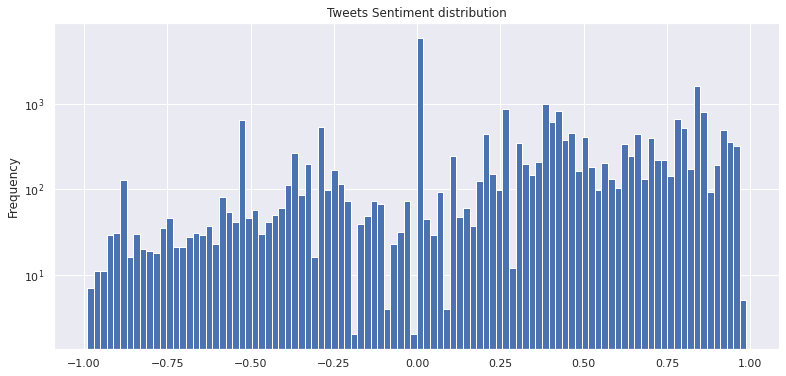

In [22]:
tweets_df["sentiment"].plot.hist(bins=100, title="Tweets Sentiment distribution",logy=True);

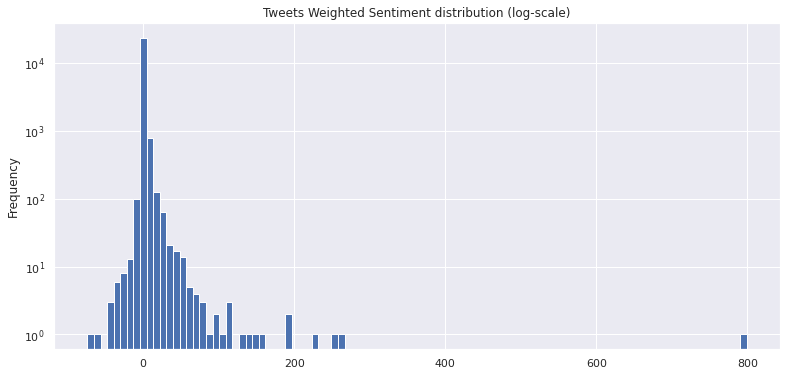

In [23]:
tweets_df["weighted_sentiment_v1"].plot.hist(bins=100,
                                            logy=True,
                                            title="Tweets Weighted Sentiment distribution (log-scale)");

In [24]:
## Aggregate per Day

tweets_sentiment_per_day_df = (tweets_df
                              .groupby('created_at_date')
                              .agg({'sentiment':["mean","median"],
                                    'weighted_sentiment_v1':["mean","median"],
                                    'weighted_sentiment_v2':["mean","median"],
                                    'weighted_sentiment_v3':["mean","median"],
                                    'weighted_sentiment_v4':["mean","median"],
                                    'weighted_sentiment_v5':["mean","median"],
                                    'weighted_sentiment_v6':["mean","median"]}))

tweets_sentiment_per_day_df = tweets_sentiment_per_day_df.reset_index()

tweets_sentiment_per_day_df.columns = ["_".join(x) for x in tweets_sentiment_per_day_df.columns]
tweets_sentiment_per_day_df = tweets_sentiment_per_day_df.rename(columns={"created_at_date_":"created_at_date"})

In [25]:
tweets_sentiment_per_day_df.head()

created_at_date  sentiment_mean  sentiment_median  \
0      2020-01-01         0.37254           0.40190   
1      2020-01-02         0.35778           0.42030   
2      2020-01-03         0.29875           0.37455   
3      2020-01-04         0.58883           0.56465   
4      2020-01-05         0.65783           0.67050   

   weighted_sentiment_v1_mean  weighted_sentiment_v1_median  \
0                     0.35519                       0.00000   
1                    -0.52253                       0.00000   
2                    -0.29402                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v2_mean  weighted_sentiment_v2_median  \
0                     0.09926                       0.00000   
1                     0.00000                       0.00000   
2                     0.00000                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v3_mean  weighted_sentiment_v3_median  \
0                     0.19851                       0.00000   
1                    -0.06532                       0.00000   
2                     0.00000                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v4_mean  weighted_sentiment_v4_median  \
0                     0.00000                       0.00000   
1                    -0.06532                       0.00000   
2                    -0.23884                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v5_mean  weighted_sentiment_v5_median  \
0                     0.35519                       0.00000   
1                    -0.58785                       0.00000   
2                    -0.53286                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v6_mean  weighted_sentiment_v6_median  
0                     0.65296                       0.00000  
1                    -0.65317                       0.00000  
2                    -0.53286                       0.00000  
3                     0.00000                       0.00000  
4                     0.00000                       0.00000

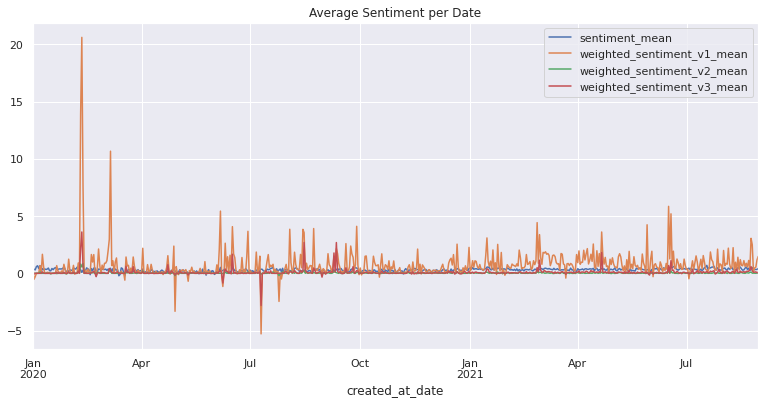

In [26]:
## Plot Average sentiment

# ylim=[-1,1]

ax1 = tweets_sentiment_per_day_df.plot.line(x="created_at_date",
                                            y="sentiment_mean");

ax2 = tweets_sentiment_per_day_df.plot.line(ax=ax1,
                                            x="created_at_date",
                                            y="weighted_sentiment_v1_mean",
                                            title="Average Sentiment per Date");

ax3 = tweets_sentiment_per_day_df.plot.line(ax=ax2,
                                            x="created_at_date",
                                            y="weighted_sentiment_v2_mean",
                                            title="Average Sentiment per Date");


ax4 = tweets_sentiment_per_day_df.plot.line(ax=ax3,
                                            x="created_at_date",
                                            y="weighted_sentiment_v3_mean",
                                            title="Average Sentiment per Date");

## Combine datasets [binance_df, tweets_sentiment_per_day_df]

In [27]:
binance_df.head()

open_time               close_time  \
2020-08-20 02:59:59.999  2020-08-19 00:00:00.000  2020-08-19 23:59:59.999   
2020-08-21 02:59:59.999  2020-08-20 00:00:00.000  2020-08-20 23:59:59.999   
2020-08-22 02:59:59.999  2020-08-21 00:00:00.000  2020-08-21 23:59:59.999   
2020-08-23 02:59:59.999  2020-08-22 00:00:00.000  2020-08-22 23:59:59.999   
2020-08-24 02:59:59.999  2020-08-23 00:00:00.000  2020-08-23 23:59:59.999   

                            open     high      low    close      volume  \
2020-08-20 02:59:59.999 50.42000 50.42000 37.77000 42.07900 11838.17200   
2020-08-21 02:59:59.999 42.28100 53.88000 39.54200 46.93000 62972.51400   
2020-08-22 02:59:59.999 46.95200 52.10000 41.35200 41.89600 47528.20400   
2020-08-23 02:59:59.999 42.18100 51.00000 41.07200 47.97800 19932.14700   
2020-08-24 02:59:59.999 48.04800 48.05700 42.82800 43.59100 17284.85500   

                         num_trades  MA_10  STD_10  Price_Change  \
2020-08-20 02:59:59.999        4880    NaN     NaN           NaN   
2020-08-21 02:59:59.999       18560    NaN     NaN       4.85000   
2020-08-22 02:59:59.999       19241    NaN     NaN      -5.03000   
2020-08-23 02:59:59.999        8238    NaN     NaN       6.08000   
2020-08-24 02:59:59.999        6039    NaN     NaN      -4.39000   

                         Price_Change%    Change  upper_bound  lower_bound  \
2020-08-20 02:59:59.999            NaN       NaN          NaN          NaN   
2020-08-21 02:59:59.999       11.53000  Increase          NaN          NaN   
2020-08-22 02:59:59.999      -10.73000  Decrease          NaN          NaN   
2020-08-23 02:59:59.999       14.52000  Increase          NaN          NaN   
2020-08-24 02:59:59.999       -9.14000  Decrease          NaN          NaN   

                         above_bound  below_bound cross_bounds open_time_date  
2020-08-20 02:59:59.999        False        False      neutral     2020-08-19  
2020-08-21 02:59:59.999        False        False      neutral     2020-08-20  
2020-08-22 02:59:59.999        False        False      neutral     2020-08-21  
2020-08-23 02:59:59.999        False        False      neutral     2020-08-22  
2020-08-24 02:59:59.999        False        False      neutral     2020-08-23

In [28]:
tweets_sentiment_per_day_df.head()

created_at_date  sentiment_mean  sentiment_median  \
0      2020-01-01         0.37254           0.40190   
1      2020-01-02         0.35778           0.42030   
2      2020-01-03         0.29875           0.37455   
3      2020-01-04         0.58883           0.56465   
4      2020-01-05         0.65783           0.67050   

   weighted_sentiment_v1_mean  weighted_sentiment_v1_median  \
0                     0.35519                       0.00000   
1                    -0.52253                       0.00000   
2                    -0.29402                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v2_mean  weighted_sentiment_v2_median  \
0                     0.09926                       0.00000   
1                     0.00000                       0.00000   
2                     0.00000                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v3_mean  weighted_sentiment_v3_median  \
0                     0.19851                       0.00000   
1                    -0.06532                       0.00000   
2                     0.00000                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v4_mean  weighted_sentiment_v4_median  \
0                     0.00000                       0.00000   
1                    -0.06532                       0.00000   
2                    -0.23884                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v5_mean  weighted_sentiment_v5_median  \
0                     0.35519                       0.00000   
1                    -0.58785                       0.00000   
2                    -0.53286                       0.00000   
3                     0.00000                       0.00000   
4                     0.00000                       0.00000   

   weighted_sentiment_v6_mean  weighted_sentiment_v6_median  
0                     0.65296                       0.00000  
1                    -0.65317                       0.00000  
2                    -0.53286                       0.00000  
3                     0.00000                       0.00000  
4                     0.00000                       0.00000

In [29]:
# Merge dataset
df = binance_df.merge(tweets_sentiment_per_day_df,
                      left_on = "open_time_date",
                      right_on = "created_at_date",
                      how="inner")

In [30]:
# Check shape (8 months x ~30 days)
df.shape

(377, 34)

# Analysis

**Final Outputs**


**General**

1. Candlestick plot (prices and boudaries) [Binance data]
2. Table for all tweets (raw) [Twitter data]


**For all days**

3. Combined Table per date (Prices, Price change, Aggregated Sentiment, Weighted Aggregated sentiment)
4. Correlation plot 
5. Correlation table

**Intra day**

6. Table with day's tweets
7. Plot with most liked tweets for this day

Need for **numerai** need below Info in a table

1. days on which price moved beyond standard deviation (up or down).
2. corresponding day which hour the price movement started
3. corresponding time what‚Äôs the tweet happened , latest popular tweet just before the price movement time


## General

In [33]:
symbol = "NMRUSDT" # "ETHUSDT"
window = 10
std_times = 2

In [34]:
## Plotly 

# candlestick plot
fig = go.Figure(data=[go.Candlestick(x=df["open_time"],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(
    yaxis_title="USDT",
    title={
        'text': symbol + " Price and cross-points",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# MA plot
fig.add_trace(
    go.Scatter(
        x = df["open_time"],
        y = df[f"MA_{window}"],
        name = "Moving average",
        mode="lines",
        line=go.scatter.Line(color="black", dash="dash"),
        showlegend=True)
)


# Upper bound
fig.add_trace(
    go.Scatter(
        x= df["open_time"],
        y= df[f"MA_{window}"] + std_times * df[f"STD_{window}"],
        name = "Upper bound",
        mode="lines",
        line=go.scatter.Line(color="lightgreen"),
        showlegend=True)
)

# Lower bound
fig.add_trace(
    go.Scatter(
        x = df["open_time"],
        y = df[f"MA_{window}"] - std_times * df[f"STD_{window}"],
        name = "Lower bound",
        mode="lines",
        line=go.scatter.Line(color="firebrick"),
        showlegend=True)
)


## Plot crossing points

low_value = int(df[['open','high','low','close']].min().min() - 10)

fig.add_trace(go.Scatter(
    x = df.loc[df['above_bound'], "open_time"],
    y = np.repeat(low_value, len(df.loc[df['above_bound'], "open_time"])),
    marker=dict(color="green", size=4),
    mode="markers",
    name = 'above_boundary'
))


fig.add_trace(go.Scatter(
    x = df.loc[df['below_bound'], "open_time"],
    y = np.repeat(low_value, len(df.loc[df['below_bound'], "open_time"])),
    marker=dict(color="crimson", size=4),
    mode="markers",
    name = 'below_boundary'
))


fig.show()

In [43]:
############## Q1: Days on which price moved beyond standard deviation (up or down)

# - Red dots   : Day's Low cross bellow MA_10 - 2*std
# - Green dots : Days' High cross above  MA_10 + 2*std

df_cross = df.query("cross_bounds != 'neutral'")[['open_time', 'close_time',
                                       'open','high','low','close',
                                       'cross_bounds', 'sentiment_mean']]

# interesting_dates = df_cross['open_time'].astype(str).values

df_cross

open_time               close_time     open     high  \
9    2020-08-28 00:00:00.000  2020-08-28 23:59:59.999 52.49700 64.80000   
54   2020-10-12 00:00:00.000  2020-10-12 23:59:59.999 28.89300 35.99000   
76   2020-11-03 00:00:00.000  2020-11-03 23:59:59.999 22.94000 28.47800   
90   2020-11-17 00:00:00.000  2020-11-17 23:59:59.999 24.07900 25.56900   
91   2020-11-18 00:00:00.000  2020-11-18 23:59:59.999 24.35300 24.81400   
94   2020-11-21 00:00:00.000  2020-11-21 23:59:59.999 23.99800 45.46500   
95   2020-11-22 00:00:00.000  2020-11-22 23:59:59.999 27.17800 41.54700   
96   2020-11-23 00:00:00.000  2020-11-23 23:59:59.999 32.46100 39.32000   
122  2020-12-19 00:00:00.000  2020-12-19 23:59:59.999 27.05200 31.02400   
139  2021-01-05 00:00:00.000  2021-01-05 23:59:59.999 27.96900 31.81700   
146  2021-01-12 00:00:00.000  2021-01-12 23:59:59.999 26.52300 37.59800   
152  2021-01-18 00:00:00.000  2021-01-18 23:59:59.999 27.82200 31.00000   
153  2021-01-19 00:00:00.000  2021-01-19 23:59:59.999 30.13600 31.12500   
169  2021-02-04 00:00:00.000  2021-02-04 23:59:59.999 29.70700 38.00000   
175  2021-02-10 00:00:00.000  2021-02-10 23:59:59.999 37.99600 49.50000   
185  2021-02-20 00:00:00.000  2021-02-20 23:59:59.999 41.58100 43.63300   
187  2021-02-22 00:00:00.000  2021-02-22 23:59:59.999 40.65000 51.89000   
188  2021-02-23 00:00:00.000  2021-02-23 23:59:59.999 44.49400 46.09400   
191  2021-02-26 00:00:00.000  2021-02-26 23:59:59.999 36.51600 42.59200   
192  2021-02-27 00:00:00.000  2021-02-27 23:59:59.999 39.60900 47.92300   
203  2021-03-10 00:00:00.000  2021-03-10 23:59:59.999 41.75900 44.79800   
204  2021-03-11 00:00:00.000  2021-03-11 23:59:59.999 40.42600 46.60300   
208  2021-03-15 00:00:00.000  2021-03-15 23:59:59.999 41.55500 46.82100   
209  2021-03-16 00:00:00.000  2021-03-16 23:59:59.999 43.43300 51.00000   
210  2021-03-17 00:00:00.000  2021-03-17 23:59:59.999 44.96800 50.00000   
211  2021-03-18 00:00:00.000  2021-03-18 23:59:59.999 47.76200 67.47900   
228  2021-04-04 00:00:00.000  2021-04-04 23:59:59.999 50.23400 75.98700   
229  2021-04-05 00:00:00.000  2021-04-05 23:59:59.999 66.16900 78.54900   
241  2021-04-17 00:00:00.000  2021-04-17 23:59:59.999 74.25100 92.75000   
265  2021-05-11 00:00:00.000  2021-05-11 23:59:59.999 59.74300 66.14500   
270  2021-05-16 00:00:00.000  2021-05-16 23:59:59.999 54.28800 97.70000   
271  2021-05-17 00:00:00.000  2021-05-17 23:59:59.999 76.04700 88.99800   
283  2021-05-29 00:00:00.000  2021-05-29 23:59:59.999 40.59300 69.00000   
284  2021-05-30 00:00:00.000  2021-05-30 23:59:59.999 54.59900 66.80000   
307  2021-06-22 00:00:00.000  2021-06-22 23:59:59.999 30.28300 33.38400   
315  2021-06-30 00:00:00.000  2021-06-30 23:59:59.999 29.34600 43.50000   
328  2021-07-13 00:00:00.000  2021-07-13 23:59:59.999 31.13800 36.66000   
329  2021-07-14 00:00:00.000  2021-07-14 23:59:59.999 31.65400 31.99000   
335  2021-07-20 00:00:00.000  2021-07-20 23:59:59.999 28.64200 32.00000   
340  2021-07-25 00:00:00.000  2021-07-25 23:59:59.999 32.76800 39.26400   
349  2021-08-03 00:00:00.000  2021-08-03 23:59:59.999 38.56700 56.58700   
350  2021-08-04 00:00:00.000  2021-08-04 23:59:59.999 37.89500 42.99000   
353  2021-08-07 00:00:00.000  2021-08-07 23:59:59.999 38.96000 41.50000   
354  2021-08-08 00:00:00.000  2021-08-08 23:59:59.999 39.62100 40.50000   
355  2021-08-09 00:00:00.000  2021-08-09 23:59:59.999 38.28000 39.80000   
356  2021-08-10 00:00:00.000  2021-08-10 23:59:59.999 39.27400 40.92400   
357  2021-08-11 00:00:00.000  2021-08-11 23:59:59.999 39.65000 43.82600   
358  2021-08-12 00:00:00.000  2021-08-12 23:59:59.999 41.40800 42.53700   
367  2021-08-21 00:00:00.000  2021-08-21 23:59:59.999 42.92300 46.09300   

         low    close cross_bounds  sentiment_mean  
9   50.00000 54.69000        above         0.33659  
54  28.77900 31.20400        above         0.27604  
76  22.80200 25.96800        above         0.28071  
90  24.01700 24.35600        above         0.32494  
91 

In [54]:
# Check raw tweets dataset
tweets_df.head(2)

author_id                 created_at             tweet_id  \
0  1141208687001780225  2021-08-30 23:46:47+00:00  1432490010046078977   
1  1150271775273619456  2021-08-30 23:41:40+00:00  1432488721979527169   

                                                                                                                       text  \
0  $nmr\nüîª decreased 4.34% in 9.8 hour(s)\nüíµ price - 42.81000000 usdt\n‚è±Ô∏è [30 aug] - 23:46:47 utc\n#nmr #nmrusdt #cryptobot   
1             $bnt $crv $nmr $ogn $rep $req $cvc $mln keep an eye out for these coins exploding soon as i have a feeling üôèüèΩ   

   like_count  quote_count  reply_count  retweet_count created_at_date  \
0           0            0            0              0      2021-08-30   
1           3            0            1              0      2021-08-30   

  created_at_date_hour  sentiment  weighted_sentiment_v1  \
0        2021-08-30 23    0.00000                0.00000   
1        2021-08-30 23    0.12800                0.38400   

   weighted_sentiment_v2  weighted_sentiment_v3  weighted_sentiment_v4  \
0                0.00000                0.00000                0.00000   
1                0.00000                0.12800                0.00000   

   weighted_sentiment_v5  weighted_sentiment_v6  
0                0.00000                0.00000  
1                0.38400                0.51200

## Correlation for all days

In [55]:
# Check final dataset (price and aggregated sentiment, per day)
df.head()

open_time               close_time     open     high  \
0  2020-08-19 00:00:00.000  2020-08-19 23:59:59.999 50.42000 50.42000   
1  2020-08-20 00:00:00.000  2020-08-20 23:59:59.999 42.28100 53.88000   
2  2020-08-21 00:00:00.000  2020-08-21 23:59:59.999 46.95200 52.10000   
3  2020-08-22 00:00:00.000  2020-08-22 23:59:59.999 42.18100 51.00000   
4  2020-08-23 00:00:00.000  2020-08-23 23:59:59.999 48.04800 48.05700   

       low    close      volume  num_trades  MA_10  STD_10  Price_Change  \
0 37.77000 42.07900 11838.17200        4880    NaN     NaN           NaN   
1 39.54200 46.93000 62972.51400       18560    NaN     NaN       4.85000   
2 41.35200 41.89600 47528.20400       19241    NaN     NaN      -5.03000   
3 41.07200 47.97800 19932.14700        8238    NaN     NaN       6.08000   
4 42.82800 43.59100 17284.85500        6039    NaN     NaN      -4.39000   

   Price_Change%    Change  upper_bound  lower_bound  above_bound  \
0            NaN       NaN          NaN          NaN        False   
1       11.53000  Increase          NaN          NaN        False   
2      -10.73000  Decrease          NaN          NaN        False   
3       14.52000  Increase          NaN          NaN        False   
4       -9.14000  Decrease          NaN          NaN        False   

   below_bound cross_bounds open_time_date created_at_date  sentiment_mean  \
0        False      neutral     2020-08-19      2020-08-19         0.24123   
1        False      neutral     2020-08-20      2020-08-20         0.23878   
2        False      neutral     2020-08-21      2020-08-21         0.12301   
3        False      neutral     2020-08-22      2020-08-22         0.18288   
4        False      neutral     2020-08-23      2020-08-23         0.22002   

   sentiment_median  weighted_sentiment_v1_mean  weighted_sentiment_v1_median  \
0           0.22630                     0.47087                      -0.00000   
1           0.38180                     0.68132                       0.00000   
2           0.00000                     0.65916                       0.00000   
3           0.27320                     0.05590                       0.00000   
4           0.38180                     3.90999                       0.00000   

   weighted_sentiment_v2_mean  weighted_sentiment_v2_median  \
0                     0.01095                       0.00000   
1                     0.05805                       0.00000   
2                     0.01934                       0.00000   
3                     0.00000                       0.00000   
4                     0.06666                       0.00000   

   weighted_sentiment_v3_mean  weighted_sentiment_v3_median  \
0                     0.04135                      -0.00000   
1                     0.08243                       0.00000   
2                     0.02691                       0.00000   
3                     0.00907                       0.00000   
4                     0.46834                       0.00000   

   weighted_sentiment_v4_mean  weighted_sentiment_v4_median  \
0                     0.18550                      -0.00000   
1                     0.14152                       0.00000   
2                     0.21391                       0.00000   
3                    -0.00022                       0.00000   
4                     0.86987                       0.00000   

   weighted_sentiment_v5_mean  weighted_sentiment_v5_median  \
0                     0.65636                      -0.00000   
1                     0.82284                       0.00000   
2                     0.87307                       0.00000   
3                     0.05569                       0.00000   
4                     4.77986                       0.00000   

   weighted_sentiment_v6_mean  weighted_sentiment_v6_median  
0                     0.70867                      -0.00000  
1                     0.96332                       0.00000  
2                     0.91932                   

In [72]:
## Scatter Plot 

x_axis = "Price_Change" # "Price_Change%"
y_axis = "weighted_sentiment_v5_mean" # "weighted_sentiment_v2_mean"


fig = px.scatter(df,
                 x=x_axis, # Price_Change%
                 y=y_axis, # weighted_sentiment_v1_mean
                 color="cross_bounds",
                 color_discrete_sequence=["grey", "green", "red"],
                 hover_name="open_time_date",
                 title="Price Change vs Average Sentiment")

fig.show()

In [57]:
print("Correlation between Price Change and Average Sentiment")

# df[["Price_Change","sentiment_mean"]].corr()
df[["Price_Change","Price_Change%",
    "sentiment_mean",
    "weighted_sentiment_v1_mean","weighted_sentiment_v2_mean","weighted_sentiment_v3_mean",
    "weighted_sentiment_v4_mean","weighted_sentiment_v5_mean","weighted_sentiment_v6_mean"]].corr()

Correlation between Price Change and Average Sentiment


Price_Change  Price_Change%  sentiment_mean  \
Price_Change                     1.00000        0.95051         0.05861   
Price_Change%                    0.95051        1.00000         0.05912   
sentiment_mean                   0.05861        0.05912         1.00000   
weighted_sentiment_v1_mean       0.08342        0.08009         0.26233   
weighted_sentiment_v2_mean       0.04313        0.03351         0.13085   
weighted_sentiment_v3_mean      -0.03010       -0.02314         0.13192   
weighted_sentiment_v4_mean       0.01625        0.02624         0.18153   
weighted_sentiment_v5_mean       0.07050        0.07016         0.25194   
weighted_sentiment_v6_mean       0.05656        0.05730         0.24662   

                            weighted_sentiment_v1_mean  \
Price_Change                                   0.08342   
Price_Change%                                  0.08009   
sentiment_mean                                 0.26233   
weighted_sentiment_v1_mean                     1.00000   
weighted_sentiment_v2_mean                     0.60838   
weighted_sentiment_v3_mean                     0.52412   
weighted_sentiment_v4_mean                     0.82608   
weighted_sentiment_v5_mean                     0.99145   
weighted_sentiment_v6_mean                     0.97408   

                            weighted_sentiment_v2_mean  \
Price_Change                                   0.04313   
Price_Change%                                  0.03351   
sentiment_mean                                 0.13085   
weighted_sentiment_v1_mean                     0.60838   
weighted_sentiment_v2_mean                     1.00000   
weighted_sentiment_v3_mean                     0.48766   
weighted_sentiment_v4_mean                     0.52674   
weighted_sentiment_v5_mean                     0.60877   
weighted_sentiment_v6_mean                     0.64695   

                            weighted_sentiment_v3_mean  \
Price_Change                                  -0.03010   
Price_Change%                                 -0.02314   
sentiment_mean                                 0.13192   
weighted_sentiment_v1_mean                     0.52412   
weighted_sentiment_v2_mean                     0.48766   
weighted_sentiment_v3_mean                     1.00000   
weighted_sentiment_v4_mean                     0.56576   
weighted_sentiment_v5_mean                     0.55039   
weighted_sentiment_v6_mean                     0.67871   

                            weighted_sentiment_v4_mean  \
Price_Change                                   0.01625   
Price_Change%                                  0.02624   
sentiment_mean                                 0.18153   
weighted_sentiment_v1_mean                     0.82608   
weighted_sentiment_v2_mean                     0.52674   
weighted_sentiment_v3_mean                     0.56576   
weighted_sentiment_v4_mean                     1.00000   
weighted_sentiment_v5_mean                     0.89256   
weighted_sentiment_v6_mean                     0.89406   

                            weighted_sentiment_v5_mean  \
Price_Change                                   0.07050   
Price_Change%                                  0.07016   
sentiment_mean                                 0.25194   
weighted_sentiment_v1_mean                     0.99145   
weighted_sentiment_v2_mean                     0.60877   
weighted_sentiment_v3_mean                     0.55039   
weighted_sentiment_v4_mean                     0.89256   
weighted_sentiment_v5_mean                     1.00000   
weighted_sentiment_v6_mean                     0.98645   

                            weighted_sentiment_v6_mean  
Price_Change                                   0.05656  
Price_Change%                                  0.05730  
sentiment_mean                                 0.24662  
weighted_sentiment_v1_mean                     0.97408  
weighted_sentiment_v2_mean                     0.64695  
weighted_sentiment_v3_mean    

In [58]:
## Price Change and Average sentiment per Day

df2 = df[["open_time_date",
          "close", "Price_Change", "Price_Change%", "cross_bounds",
          "sentiment_mean","weighted_sentiment_v1_mean"]]

## Sort days based on sentiment

# "sentiment_mean", "weighted_sentiment_v1_mean"
df2.sort_values("sentiment_mean",ascending=False)

open_time_date    close  Price_Change  Price_Change% cross_bounds  \
333     2021-07-18 30.56000      -0.05000       -0.17000      neutral   
339     2021-07-24 32.82500       0.47000        1.44000      neutral   
305     2021-06-20 36.70300       0.16000        0.43000      neutral   
306     2021-06-21 30.39300      -6.31000      -17.19000      neutral   
303     2021-06-18 38.64400      -0.01000       -0.03000      neutral   
..             ...      ...           ...            ...          ...   
14      2020-09-02 48.99800      -1.89000       -3.72000      neutral   
222     2021-03-29 48.31800       2.51000        5.47000      neutral   
73      2020-10-31 23.23300      -1.00000       -4.11000      neutral   
59      2020-10-17 28.63600       0.32000        1.15000      neutral   
79      2020-11-06 24.09500       0.63000        2.67000      neutral   

     sentiment_mean  weighted_sentiment_v1_mean  
333         0.69409                     0.27542  
339         0.60896                     0.46971  
305         0.59028                     1.93422  
306         0.56299                     0.41865  
303         0.55674                     5.19574  
..              ...                         ...  
14          0.05612                    -0.03948  
222         0.04498                     0.19985  
73          0.03429                     0.05591  
59          0.02815                    -0.33480  
79         -0.05117                     0.00063  

[377 rows x 7 columns]

In [59]:
# Table per day

# - Days with Negative Price action
# df2.query("cross_bounds=='below'")

# - Days with Positive Price action
# df2.query("cross_bounds=='above'").sort_values("sentiment_mean")

## Intra day

### Price Action

In [154]:
## Check interesting dates
df_cross.head(12)

open_time               close_time     open     high  \
9    2020-08-28 00:00:00.000  2020-08-28 23:59:59.999 52.49700 64.80000   
54   2020-10-12 00:00:00.000  2020-10-12 23:59:59.999 28.89300 35.99000   
76   2020-11-03 00:00:00.000  2020-11-03 23:59:59.999 22.94000 28.47800   
90   2020-11-17 00:00:00.000  2020-11-17 23:59:59.999 24.07900 25.56900   
91   2020-11-18 00:00:00.000  2020-11-18 23:59:59.999 24.35300 24.81400   
94   2020-11-21 00:00:00.000  2020-11-21 23:59:59.999 23.99800 45.46500   
95   2020-11-22 00:00:00.000  2020-11-22 23:59:59.999 27.17800 41.54700   
96   2020-11-23 00:00:00.000  2020-11-23 23:59:59.999 32.46100 39.32000   
122  2020-12-19 00:00:00.000  2020-12-19 23:59:59.999 27.05200 31.02400   
139  2021-01-05 00:00:00.000  2021-01-05 23:59:59.999 27.96900 31.81700   
146  2021-01-12 00:00:00.000  2021-01-12 23:59:59.999 26.52300 37.59800   
152  2021-01-18 00:00:00.000  2021-01-18 23:59:59.999 27.82200 31.00000   

         low    close cross_bounds  sentiment_mean  
9   50.00000 54.69000        above         0.33659  
54  28.77900 31.20400        above         0.27604  
76  22.80200 25.96800        above         0.28071  
90  24.01700 24.35600        above         0.32494  
91  22.88000 23.78900        below         0.32098  
94  23.66800 27.18500        above         0.12371  
95  25.88500 32.47300        above         0.21545  
96  31.59900 34.13900        above         0.28626  
122 26.56100 29.22500        above         0.33707  
139 26.60000 28.35400        above         0.39183  
146 26.44000 27.09500        above         0.24496  
152 27.17300 30.09600        above         0.32074

In [155]:
# Select a single date
select_date = "2021-01-18"
binance_df_intra_day_single_day = binance_df_intra_day.query('open_time_date == @select_date')

In [156]:
## Plotly 

# candlestick plot
fig1 = go.Figure(data=[go.Candlestick(x=binance_df_intra_day_single_day["open_time"],
                open=binance_df_intra_day_single_day['open'],
                high=binance_df_intra_day_single_day['high'],
                low=binance_df_intra_day_single_day['low'],
                close=binance_df_intra_day_single_day['close'])])

fig1.update_layout(
    yaxis_title="USDT",
    title={
        'text': symbol + " Intra day Price (1H bars)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig1.show()

In [158]:
################ Q2. For the corresponding day, which hour the price movement started?

# In which point the Price crossed the boundary?

# Extract the bound for this date
cross_bounds_value = df.query('open_time_date == @select_date')["cross_bounds"].item()


# Find the corresponding candle
if cross_bounds_value == "above":
    bound = df.query('open_time_date == @select_date')["upper_bound"].item()
    print("Cross bound:", cross_bounds_value, "- " , bound)
    candle_id = (binance_df_intra_day_single_day["high"]>=bound).idxmax()
    
elif cross_bounds_value == "below":
    bound = df.query('open_time_date == @select_date')["lower_bound"].item()
    print("Cross bound:", cross_bounds_value, "- " , bound)
    candle_id = (binance_df_intra_day_single_day["low"]<=bound).idxmax()
    
# Print message
price_action_starting_time = binance_df_intra_day_single_day.loc[[candle_id]]["open_time"].item()
print("The price action started at:", price_action_starting_time)
display(binance_df_intra_day_single_day.loc[[candle_id]])

Cross bound: above -  30.73217609180299
The price action started at: 2021-01-18 08:00:00.000


open_time     open     high      low    close     volume  \
285  2021-01-18 08:00:00.000 28.93600 31.00000 28.84900 30.67200 3137.30200   

                  close_time         qav  num_trades  taker_base_vol  \
285  2021-01-18 08:59:59.999 93195.31731        1038      1943.87100   

     taker_quote_vol  ignore open_time_date  
285      57836.05260       0     2021-01-18

### Relevant Tweet

In [159]:
# Extract tweets for specifc date
intra_day_tweets = tweets_df.query("created_at_date == @select_date")
print(f"There are {len(intra_day_tweets)} tweets for this date")

There are 44 tweets for this date


In [160]:
## Check day's tweets
intra_day_tweets.sort_values("like_count", ascending=False).head(3)

author_id                 created_at             tweet_id  \
13312   787784121166733312  2021-01-18 00:53:16+00:00  1350969470131589123   
13304   948551073387642880  2021-01-18 04:47:04+00:00  1351028310936080396   
13308  1311543533988319232  2021-01-18 03:39:59+00:00  1351011428619198469   

                                                                                                                                                                                                                                                                                         text  \
13312                           if i worked for yearn, i would pay ungodly amounts of money to @jonathansidego to do the v2 branding + films. he's probably the best designer/filmmaker in crypto imo. \n\nsee the $nmr video: https://t.co/u1xhzr2tgf\n\ncc @bantg @milkyklim @tracheopteryx   
13304                                  [scan results - 15m - #btc pair]\n\ntop 5 bullish trend strength: \n1: $ksm\n2: $nmr\n3: $ftt\n4: $rvn\n5: $gvt\n\ntop 5 bullish reversal potential: \n1: $vib\n2: $ltc\n3: $hive\n4: $xvg\n5: $evx\n\nall results on https://t.co/vmsa8rwq1g website!   
13308  native mineral resources has appointed mr. chris jacobs as chief financial officer of the company. chris is an experienced chief financial officer within the mining and manufacturing sectors and has previous experience in management consulting. https://t.co/xbvzjmyqat #asx $nmr   

       like_count  quote_count  reply_count  retweet_count created_at_date  \
13312          38            0            4              2      2021-01-18   
13304           9            0            0              1      2021-01-18   
13308           9            0            0              5      2021-01-18   

      created_at_date_hour  sentiment  weighted_sentiment_v1  \
13312         2021-01-18 0    0.58590               22.26420   
13304         2021-01-18 4    0.72630                6.53670   
13308         2021-01-18 3    0.00000                0.00000   

       weighted_sentiment_v2  weighted_sentiment_v3  weighted_sentiment_v4  \
13312                0.00000                2.34360                1.17180   
13304                0.00000                0.00000                0.72630   
13308                0.00000                0.00000                0.00000   

       weighted_sentiment_v5  weighted_sentiment_v6  
13312               23.43600               25.77960  
13304                7.26300                7.26300  
13308                0.00000                0.00000

In [146]:
##### Plot: Check most liked tweets

# 'like_count' 'quote_count', 'reply_count', 'retweet_count'

fig2 = px.line(intra_day_tweets,
              x="created_at", y='like_count',
              title=f'{select_date} | Intra-day Likes on tweets',
              hover_name="author_id", # username
              hover_data=["created_at", "like_count","tweet_id","text"])


fig2.show()

In [153]:
#### Q3. Corresponding time what‚Äôs the tweet happened,
#### latest popular tweet just before the price movement time

print("price_action_starting_time", price_action_starting_time)

(intra_day_tweets
 .query("created_at < @price_action_starting_time")
 .sort_values("like_count", ascending=False)
 .head(3))

price_action_starting_time 2020-08-28 04:00:00.000


author_id                 created_at             tweet_id  \
19588   787098414437675008  2020-08-28 00:56:17+00:00  1299148765538865152   
19577  1274179205001932800  2020-08-28 01:34:41+00:00  1299158430343593985   
19561  1188193371808059392  2020-08-28 03:44:52+00:00  1299191190034755584   

                                                                                                                                                                                                                                                                                                                text  \
19588                                                                                                                                                                   i have ~$500k worth of $nmr staked in the @numerai tournament, and i plan on adding more.\n\nmy goal is to have more $nmr than @richardcraib   
19577    the concept i shared the other night  regarding ‚Äòbracketed‚Äô markets applies to all markets, like $nmr @numerai \n\nhere üëá, ‚Äòconsolidation‚Äô is trading in brackets \n\nthis is ‚Äòaccumulation‚Äô, or buyers buying up inventory \n\nfinally, sellers waved their üè≥Ô∏è + price broke out üåã https://t.co/ch9nwxljn4   
19561  here is a portfolio update.  \ni have dumped a few things and bought others since last time.  not including any bags bellow 1% of portfolio or on metamask... \n\n$srm $ftt $btc $dot $om $strat $xlm $nmr $xtz $rsr $band $dusk $prq $ocean $gnt $matic $sxp https://t.co/3isrsxdkk3 https://t.co/qoaencrhy1   

       like_count  quote_count  reply_count  retweet_count created_at_date  \
19588          54            1            4              3      2020-08-28   
19577           6            0            0              0      2020-08-28   
19561           4            0            0              0      2020-08-28   

      created_at_date_hour  sentiment  weighted_sentiment_v1  \
19588         2020-08-28 0    0.22630               12.22020   
19577         2020-08-28 1    0.27320                1.63920   
19561         2020-08-28 3   -0.40190               -1.60760   

       weighted_sentiment_v2  weighted_sentiment_v3  weighted_sentiment_v4  \
19588                0.22630                0.90520                0.67890   
19577                0.00000                0.00000                0.00000   
19561               -0.00000               -0.00000               -0.00000   

       weighted_sentiment_v5  weighted_sentiment_v6  
19588               12.89910               14.03060  
19577                1.63920                1.63920  
19561               -1.60760               -1.60760

In [41]:
### Save the plot in the path you want! 
# fig.write_html("../outcome/Intra-day Likes on tweets.html")

In [67]:
## Plot: Sentiment vs Likes

fig = px.scatter(intra_day_tweets,
                 x="sentiment", y="like_count",
                 title=f'{select_date} | Sentiment vs Likes',
                 hover_name="author_id", # username
                 hover_data=["created_at", "like_count","tweet_id","text"])
fig.show()

In [43]:
### Save the plot in the path you want! 
# fig.write_html("../outcome/sentiment_vs_likes.html")

In [68]:
## Intra-day likes vs sentiment correlation
intra_day_tweets[["like_count","sentiment"]].corr()

like_count  sentiment
like_count     1.00000    0.05450
sentiment      0.05450    1.00000

## App

**TODO**

1. About, Introduction, Description (formulas, design document, etc)
2. Filter, Sort, Select in pd DataFrame in Stremlit app
3. Connect Plotly graph with tweets table (click plotly app and update tweets table)